<h1 style='color: blue; font-size: 34px; font-weight: bold;'> Projeto Proposto 
</h1>
<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i> Este projeto tem o intuito de estudar Redes Neurais Artificiais e suas aplicações em Deep Learning </i>       
</p>  

# <font color='orange' style='font-size: 40px;'> Bibliotecas Utilizadas </font>
<hr style='border: 2px solid orange;'>

In [10]:
## Bibliotecas Gerais 
import sys
sys.executable
import re

## Bibliotecas de Análise de Dados
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from IPython.display import display, Image
from matplotlib.lines import Line2D
from matplotlib.ticker import FuncFormatter
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import matplotlib.dates as mdates
import matplotlib.colors as mcolors

# Bibliotecas de Manipulação de Tempo
from datetime import datetime, date, timedelta

## Bibliotecas de Modelagem Matemática e Estatística
import numpy as np
import scipy as sp 
import scipy.stats as stats
from scipy.special import erf  # Para GELU
import random


# Bibliotecas de Pré-Processamento e Pipeline
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_validate, cross_val_predict
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from category_encoders import CatBoostEncoder

# Bibliotecas de Modelos de Machine Learning
import joblib
from joblib import Parallel, delayed
import pickle
from hyperopt import hp, tpe, fmin, Trials, STATUS_OK
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import lightgbm as lgb
from lightgbm import LGBMRegressor, LGBMClassifier, early_stopping
from sklearn.cluster import KMeans
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
import networkx as nx
import shap

# Bibliotecas de Métricas de Machine Learning
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_log_error, mean_absolute_percentage_error, accuracy_score, roc_auc_score, roc_curve, auc, precision_score, recall_score, precision_recall_curve, average_precision_score, f1_score, log_loss, brier_score_loss, confusion_matrix, cohen_kappa_score, silhouette_score


# Bibliotecas de Modelos de Deep Learning
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torch.cuda.amp import autocast, GradScaler
from torch.nn import init
from tqdm import tqdm
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("PyTorch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
print("CUDA version:", torch.version.cuda)
print("GPU:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "None")


# Parâmetros de Otimização
import warnings
%matplotlib inline
sns.set()
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = '14'
plt.rcParams['figure.figsize'] = [10, 5]
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x) # Tira os números do formato de Notação Científica
np.set_printoptions(suppress=True) # Tira os números do formato de Notação Científica em Numpy Arrays
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning) # Retira Future Warnings

# pip freeze > requirements.txt

PyTorch version: 2.5.1
CUDA available: True
CUDA version: 11.8
GPU: NVIDIA GeForce RTX 2060 SUPER


# <font color='orange' style='font-size: 40px;'> Funções de Ativação </font>
<hr style='border: 2px solid orange;'>

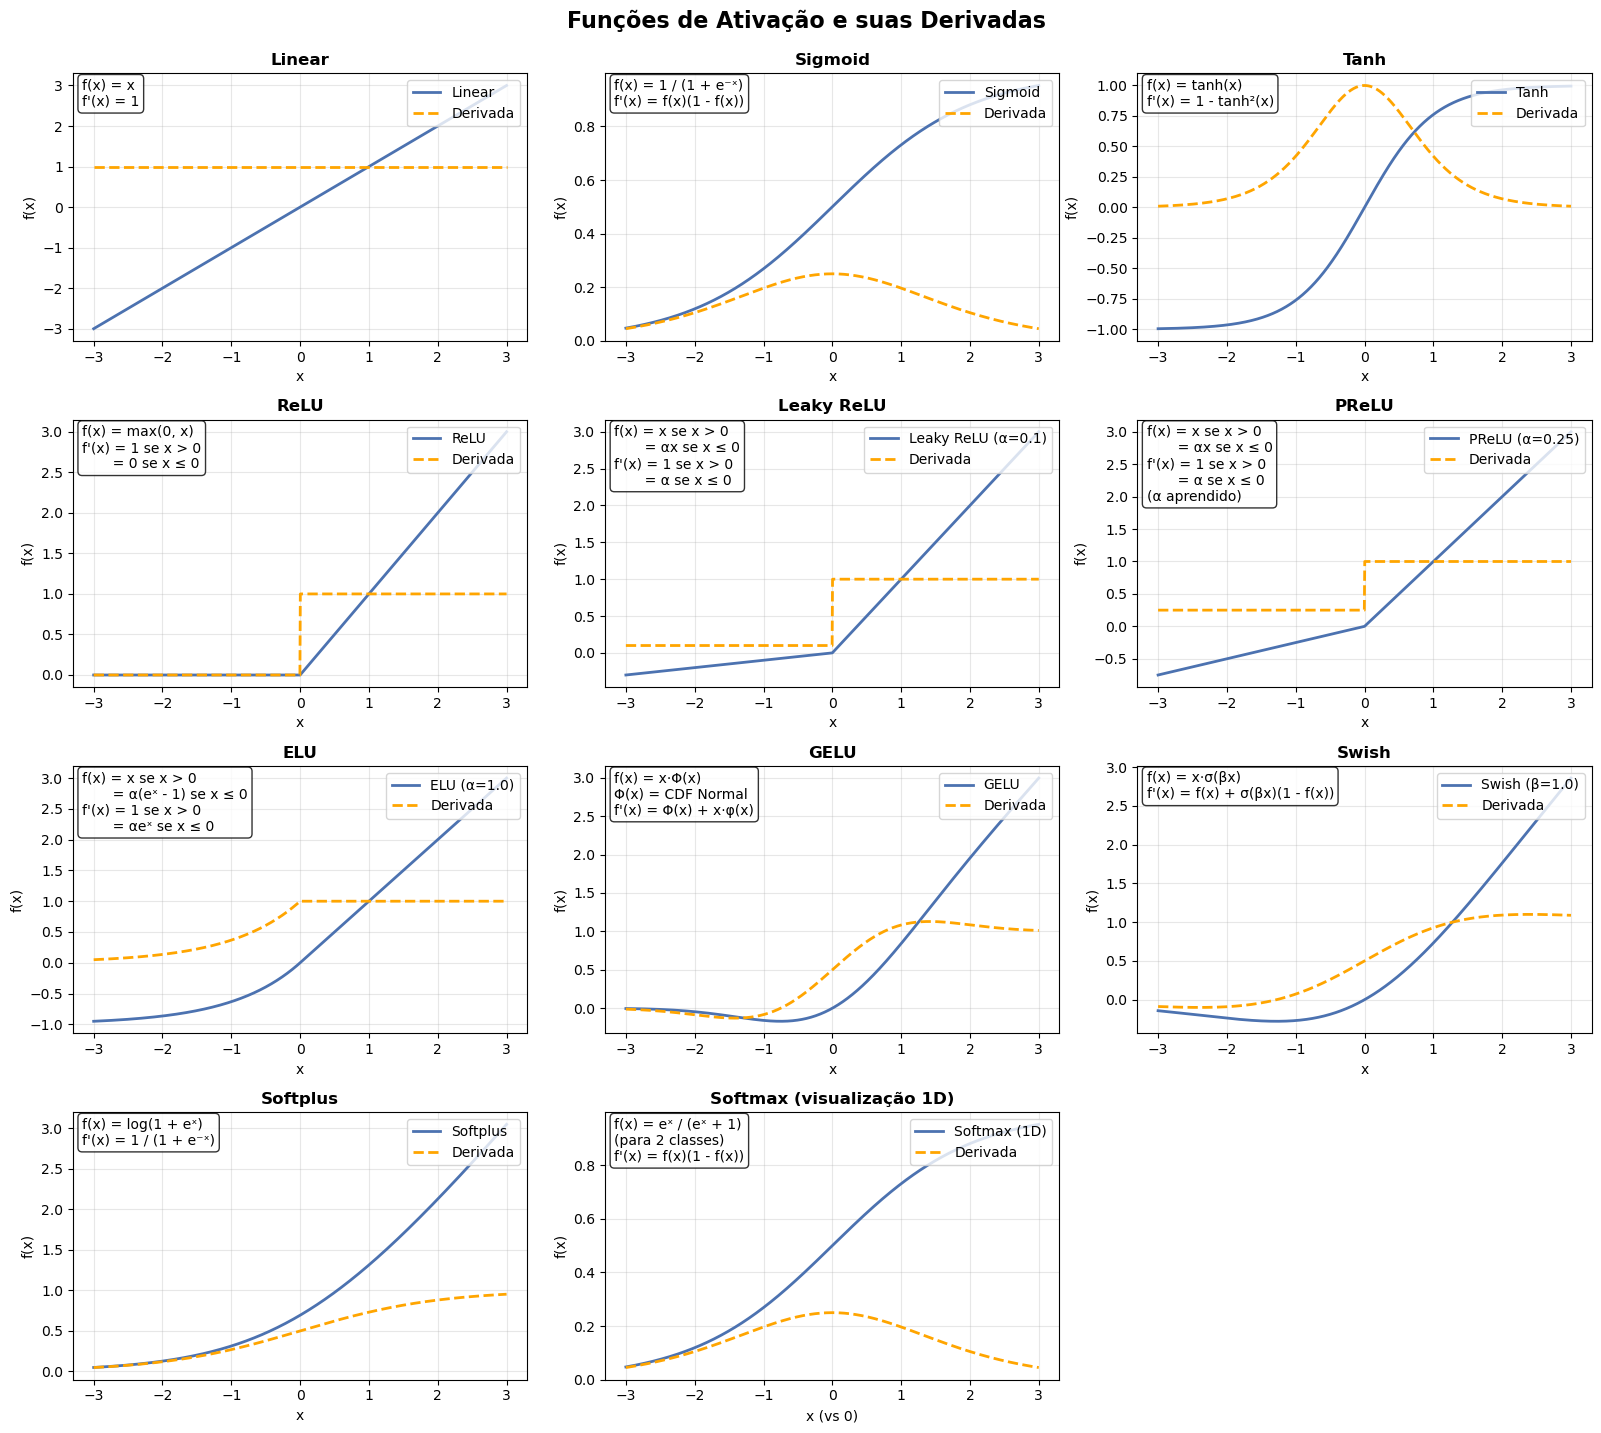

In [11]:
# Configurações gerais
plt.style.use('default')
plt.rcParams['figure.figsize'] = [15, 12]
plt.rcParams['font.size'] = 10

# Criação da figura com subplots
fig, axes = plt.subplots(4, 3, figsize=(16, 14))
axes = axes.flatten()

# Range de valores para x
x = np.linspace(-3, 3, 1000)

# 1. LINEAR
ax = axes[0]
y = x
dy = np.ones_like(x)
ax.plot(x, y, 'b-', linewidth=2, label='Linear')
ax.plot(x, dy, 'orange', linewidth=2, linestyle='--', label='Derivada')
ax.set_title('Linear', fontsize=12, fontweight='bold')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.grid(True, alpha=0.3)
ax.legend(loc='upper right')
ax.text(0.02, 0.98, 'f(x) = x\nf\'(x) = 1', 
        transform=ax.transAxes, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# 2. SIGMOIDE
ax = axes[1]
y = 1 / (1 + np.exp(-x))
dy = y * (1 - y)
ax.plot(x, y, 'b-', linewidth=2, label='Sigmoid')
ax.plot(x, dy, 'orange', linewidth=2, linestyle='--', label='Derivada')
ax.set_title('Sigmoid', fontsize=12, fontweight='bold')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.grid(True, alpha=0.3)
ax.legend(loc='upper right')
ax.text(0.02, 0.98, 'f(x) = 1 / (1 + e⁻ˣ)\nf\'(x) = f(x)(1 - f(x))', 
        transform=ax.transAxes, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# 3. TANGENTE HIPERBÓLICA
ax = axes[2]
y = np.tanh(x)
dy = 1 - y**2
ax.plot(x, y, 'b-', linewidth=2, label='Tanh')
ax.plot(x, dy, 'orange', linewidth=2, linestyle='--', label='Derivada')
ax.set_title('Tanh', fontsize=12, fontweight='bold')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.grid(True, alpha=0.3)
ax.legend(loc='upper right')
ax.text(0.02, 0.98, 'f(x) = tanh(x)\nf\'(x) = 1 - tanh²(x)', 
        transform=ax.transAxes, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# 4. ReLU
ax = axes[3]
y = np.maximum(0, x)
dy = np.where(x > 0, 1, 0)
ax.plot(x, y, 'b-', linewidth=2, label='ReLU')
ax.plot(x, dy, 'orange', linewidth=2, linestyle='--', label='Derivada')
ax.set_title('ReLU', fontsize=12, fontweight='bold')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.grid(True, alpha=0.3)
ax.legend(loc='upper right')
ax.text(0.02, 0.98, 'f(x) = max(0, x)\nf\'(x) = 1 se x > 0\n       = 0 se x ≤ 0', 
        transform=ax.transAxes, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# 5. LEAKY ReLU (alpha=0.1)
ax = axes[4]
alpha = 0.1
y = np.where(x > 0, x, alpha * x)
dy = np.where(x > 0, 1, alpha)
ax.plot(x, y, 'b-', linewidth=2, label=f'Leaky ReLU (α={alpha})')
ax.plot(x, dy, 'orange', linewidth=2, linestyle='--', label='Derivada')
ax.set_title('Leaky ReLU', fontsize=12, fontweight='bold')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.grid(True, alpha=0.3)
ax.legend(loc='upper right')
ax.text(0.02, 0.98, 'f(x) = x se x > 0\n       = αx se x ≤ 0\nf\'(x) = 1 se x > 0\n       = α se x ≤ 0', 
        transform=ax.transAxes, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# 6. PReLU (Parametric ReLU) com parâmetro aprendível = 0.25
ax = axes[5]
alpha = 0.25  # Valor de exemplo (normalmente aprendido)
y = np.where(x > 0, x, alpha * x)
dy = np.where(x > 0, 1, alpha)
ax.plot(x, y, 'b-', linewidth=2, label=f'PReLU (α={alpha})')
ax.plot(x, dy, 'orange', linewidth=2, linestyle='--', label='Derivada')
ax.set_title('PReLU', fontsize=12, fontweight='bold')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.grid(True, alpha=0.3)
ax.legend(loc='upper right')
ax.text(0.02, 0.98, 'f(x) = x se x > 0\n       = αx se x ≤ 0\nf\'(x) = 1 se x > 0\n       = α se x ≤ 0\n(α aprendido)', 
        transform=ax.transAxes, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# 7. ELU (Exponential Linear Unit)
ax = axes[6]
alpha = 1.0
y = np.where(x > 0, x, alpha * (np.exp(x) - 1))
dy = np.where(x > 0, 1, alpha * np.exp(x))
ax.plot(x, y, 'b-', linewidth=2, label=f'ELU (α={alpha})')
ax.plot(x, dy, 'orange', linewidth=2, linestyle='--', label='Derivada')
ax.set_title('ELU', fontsize=12, fontweight='bold')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.grid(True, alpha=0.3)
ax.legend(loc='upper right')
ax.text(0.02, 0.98, 'f(x) = x se x > 0\n       = α(eˣ - 1) se x ≤ 0\nf\'(x) = 1 se x > 0\n       = αeˣ se x ≤ 0', 
        transform=ax.transAxes, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# 8. GELU (Gaussian Error Linear Unit)
ax = axes[7]
y = 0.5 * x * (1 + erf(x / np.sqrt(2)))
# Derivada aproximada da GELU
dy_gelu = 0.5 * (1 + erf(x / np.sqrt(2))) + (x / np.sqrt(2 * np.pi)) * np.exp(-x**2 / 2)
ax.plot(x, y, 'b-', linewidth=2, label='GELU')
ax.plot(x, dy_gelu, 'orange', linewidth=2, linestyle='--', label='Derivada')
ax.set_title('GELU', fontsize=12, fontweight='bold')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.grid(True, alpha=0.3)
ax.legend(loc='upper right')
ax.text(0.02, 0.98, 'f(x) = x·Φ(x)\nΦ(x) = CDF Normal\nf\'(x) = Φ(x) + x·φ(x)', 
        transform=ax.transAxes, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# 9. SWISH (β=1)
ax = axes[8]
beta = 1.0
y = x / (1 + np.exp(-beta * x))
# Derivada do Swish
sigmoid = 1 / (1 + np.exp(-beta * x))
dy = sigmoid * (1 + beta * x * (1 - sigmoid))
ax.plot(x, y, 'b-', linewidth=2, label=f'Swish (β={beta})')
ax.plot(x, dy, 'orange', linewidth=2, linestyle='--', label='Derivada')
ax.set_title('Swish', fontsize=12, fontweight='bold')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.grid(True, alpha=0.3)
ax.legend(loc='upper right')
ax.text(0.02, 0.98, 'f(x) = x·σ(βx)\nf\'(x) = f(x) + σ(βx)(1 - f(x))', 
        transform=ax.transAxes, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# 10. SOFTPLUS
ax = axes[9]
y = np.log(1 + np.exp(x))
dy = 1 / (1 + np.exp(-x))  # Sigmoide
ax.plot(x, y, 'b-', linewidth=2, label='Softplus')
ax.plot(x, dy, 'orange', linewidth=2, linestyle='--', label='Derivada')
ax.set_title('Softplus', fontsize=12, fontweight='bold')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.grid(True, alpha=0.3)
ax.legend(loc='upper right')
ax.text(0.02, 0.98, 'f(x) = log(1 + eˣ)\nf\'(x) = 1 / (1 + e⁻ˣ)', 
        transform=ax.transAxes, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# 11. SOFTMAX (para um único valor, visualização 1D)
ax = axes[10]
# Para visualização 1D, consideramos softmax de [x, 0]
y = np.exp(x) / (np.exp(x) + np.exp(0))
# Derivada da softmax 1D
dy = y * (1 - y)  # Mesmo que sigmoide para 2 classes
ax.plot(x, y, 'b-', linewidth=2, label='Softmax (1D)')
ax.plot(x, dy, 'orange', linewidth=2, linestyle='--', label='Derivada')
ax.set_title('Softmax (visualização 1D)', fontsize=12, fontweight='bold')
ax.set_xlabel('x (vs 0)')
ax.set_ylabel('f(x)')
ax.grid(True, alpha=0.3)
ax.legend(loc='upper right')
ax.text(0.02, 0.98, 'f(x) = eˣ / (eˣ + 1)\n(para 2 classes)\nf\'(x) = f(x)(1 - f(x))', 
        transform=ax.transAxes, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Remover o último subplot não usado
axes[11].axis('off')

# Ajustar layout
plt.tight_layout()
plt.suptitle('Funções de Ativação e suas Derivadas', fontsize=16, fontweight='bold', y=1.02)
plt.show()

# Código para salvar a figura
# plt.savefig('funcoes_ativacao.png', dpi=300, bbox_inches='tight')

# <font color='orange' style='font-size: 40px;'> Backpropagation </font>
<hr style='border: 2px solid orange;'>

# <font color='green' style='font-size: 30px;'> 1.1) Tema 1 </font>
<hr style='border: 2px solid green;'>


# <font color='orange' style='font-size: 40px;'> PyTorch Tutorial </font>
<hr style='border: 2px solid orange;'>

# <font color='green' style='font-size: 30px;'> 1.1) Tema 1 </font>
<hr style='border: 2px solid green;'>

https://www.kaggle.com/code/purvitsharma/pytorch-deep-learning-tutorial-zero-to-hero

# <font color='orange' style='font-size: 40px;'> Multilayer Perceptron </font>
<hr style='border: 2px solid orange;'>

# <font color='green' style='font-size: 30px;'> 1.1) Teste 1 </font>
<hr style='border: 2px solid green;'>

https://www.kaggle.com/code/renangomes/solu-o-simplificada-utilizando-mlp-pt-br

# <font color='green' style='font-size: 30px;'> 1.2) Teste 2 </font>
<hr style='border: 2px solid green;'>

https://www.kaggle.com/code/androbomb/simple-nn-with-python-multi-layer-perceptron

# <font color='green' style='font-size: 30px;'> 1.3) Teste 3 </font>
<hr style='border: 2px solid green;'>

https://www.kaggle.com/code/mishra1993/pytorch-multi-layer-perceptron-mnist

# <font color='orange' style='font-size: 40px;'> Redes Neurais Convolucionais </font>
<hr style='border: 2px solid orange;'>



# <font color='green' style='font-size: 30px;'> 1.1) Teste 1 </font>
<hr style='border: 2px solid green;'>

https://www.kaggle.com/code/kanncaa1/convolutional-neural-network-cnn-tutorial

# <font color='green' style='font-size: 30px;'> 1.2) Teste 2 </font>
<hr style='border: 2px solid green;'>

https://www.kaggle.com/code/mishki/getting-started-with-deep-learning-cnn-pytorch

# <font color='orange' style='font-size: 40px;'> Redes Neurais Recorrentes </font>
<hr style='border: 2px solid orange;'>

# <font color='green' style='font-size: 30px;'> 1.1) Teste 1 </font>
<hr style='border: 2px solid green;'>

https://www.kaggle.com/code/codeblogger/recurrent-neural-network-rnn-tutorial

# <font color='green' style='font-size: 30px;'> 1.2) Teste 2 </font>
<hr style='border: 2px solid green;'>

https://www.kaggle.com/code/kanncaa1/recurrent-neural-network-with-pytorch

# <font color='orange' style='font-size: 40px;'> Autoencoders </font>
<hr style='border: 2px solid orange;'>

# <font color='green' style='font-size: 30px;'> 1.1) Teste 1 </font>
<hr style='border: 2px solid green;'>

https://www.kaggle.com/code/rockystats/understanding-auto-encoders

# <font color='green' style='font-size: 30px;'> 1.2) Teste 2 </font>
<hr style='border: 2px solid green;'>

https://www.kaggle.com/code/kazushiadachi/autoencoder-and-variational-autoencoder-tutorial

# <font color='orange' style='font-size: 40px;'> NLP Tutorial </font>
<hr style='border: 2px solid orange;'>

# <font color='green' style='font-size: 30px;'> 1.1) Teste 1 </font>
<hr style='border: 2px solid green;'>

https://www.kaggle.com/code/tanulsingh077/deep-learning-for-nlp-zero-to-transformers-bert

# <font color='orange' style='font-size: 40px;'> Transformers </font>
<hr style='border: 2px solid orange;'>

https://www.kaggle.com/discussions/getting-started/587250

# <font color='green' style='font-size: 30px;'> 1.1) Teste 1 </font>
<hr style='border: 2px solid green;'>

https://medium.com/@ian.barreiro/transformers-uma-implementa%C3%A7%C3%A3o-em-python-b9eb9305482d

# <font color='green' style='font-size: 30px;'> 1.2) Teste 2 </font>
<hr style='border: 2px solid green;'>

https://airtonlirajr.medium.com/criando-um-llm-do-zero-com-transformers-f97e3436eea4

# <font color='green' style='font-size: 30px;'> 1.3) Teste 3 </font>
<hr style='border: 2px solid green;'>

https://www.kaggle.com/code/divyapatel4/transformer-implementation-training

# <font color='green' style='font-size: 30px;'> 1.4) Teste 4 </font>
<hr style='border: 2px solid green;'>

https://www.kaggle.com/code/alejopaullier/introduction-to-transformers